## Data Wrangling in PySpark
Complete the tasks below using PySpark. You can export the Spark DataFrame to Pandas when **necessary**.

### Task I
Connect to Spark cluster by launching SparkSession

In [2]:
# Let's start Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

### Download DATA

You can find the stock price data [here](https://drive.google.com/file/d/19z6AKWpKOQLpOiiLZ_QoprsPtIcOipNa/view?usp=sharing)

## Import Modules

In [3]:
from pyspark.sql import functions as f

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

### Load Data

In [4]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [5]:
data = spark.read.csv(
    'stocks_price_final.csv',
    sep = ',',
    header = True,
    schema = final_struc
    )

In [6]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



### Task II
How many distinct symbols do we have for each exchange?

In [15]:
data.select("exchange","symbol").groupBy("exchange").agg(f.countDistinct("symbol").alias("number of companies")).show()

+--------+-------------------+
|exchange|number of companies|
+--------+-------------------+
|    NYSE|               1911|
|  NASDAQ|               2713|
+--------+-------------------+



### Task III
What is the most expensice stock on NYSE and NASDAQ respectively (use the latest day available)?

### Task IV
Compute the average opening and closing price per sector and convert it into Pandas DataFrame

In [16]:
sec_df =  data.select(['sector', 'open', 'close']).groupBy('sector').mean().toPandas()

In [17]:
sec_df

,sector,avg(open),avg(close)
0,Miscellaneous,52.038395,52.063629
1,Health Care,119.967633,119.078061
2,Public Utilities,35.580777,35.585282
3,Energy,24.456590,24.427350
4,Consumer Non-Durables,43.328603,43.330386
5,Finance,37.774667,37.779002
6,Basic Industries,266410.354701,265750.361367
7,Capital Goods,60.488544,60.516555
8,Technology,49.516045,49.534799
9,Consumer Services,55.078867,55.055248


### Task V
Compute the mean and median opening and closing price per industry and convert it into Pandas DataFrame

In [ ]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
industries_x.head()

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Miscellaneous manufacturing industries,15.660586,15.650935,15.369819


### Task VI
How many companies are there in the sector 'Health Care'.

In [24]:
health = data.filter(f.col('sector') == 'Health Care')

health.select("symbol").distinct().count()

872

### Task VII
Plot the average adjusted price of **Technology** sector stock over the time

In [29]:
tech = data.where(f.col('sector') == 'Technology').select('data', 'adjusted')

tech = tech.groupby("data").mean()

In [30]:
tech_df = tech.toPandas()

<AxesSubplot:xlabel='data'>

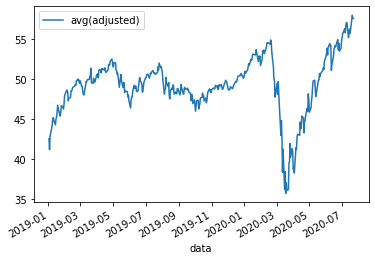

In [42]:
tech_df["data"] = pd.to_datetime(tech_df["data"])
tech_df.set_index("data").sort_index().plot()